Connect Python to MySQL

In [5]:
import pymysql
import pandas as pd

# Connect to MySQL database
conn = pymysql.connect(host='localhost', user='root', password='Monica@2003', database='hotel')

# Read data into Pandas DataFrames
customers = pd.read_sql("SELECT * FROM customer", conn)
rooms = pd.read_sql("SELECT * FROM room", conn)
bookings = pd.read_sql("SELECT * FROM bookings", conn)
payments = pd.read_sql("SELECT * FROM payments", conn)


Data Cleaning

In [6]:
# Check for missing values
print(customers.isnull().sum())
print(bookings.isnull().sum())

# Drop missing payment_id for unpaid bookings
bookings.dropna(subset=['payment_status'], inplace=True)

customer_id    0
name           0
phone          0
email          0
room_no        0
dtype: int64
booking_id             0
room_no                0
customer_id            0
check_in_date          0
no_of_days_booking     0
payment_id            20
payment_status         0
dtype: int64


Data Insights & Analysis

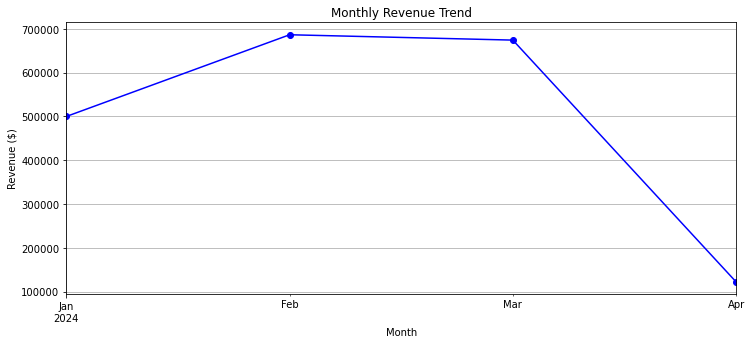

In [18]:
# Revenue Generated Over Time

payments['payment_date'] = pd.to_datetime(payments['payment_date'])

# Aggregate revenue by month
revenue_trend = payments.groupby(payments['payment_date'].dt.to_period("M")).sum()['amount']

# Plot
plt.figure(figsize=(12,5))
revenue_trend.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue ($)")
plt.xlabel("Month")
plt.grid()
plt.show()


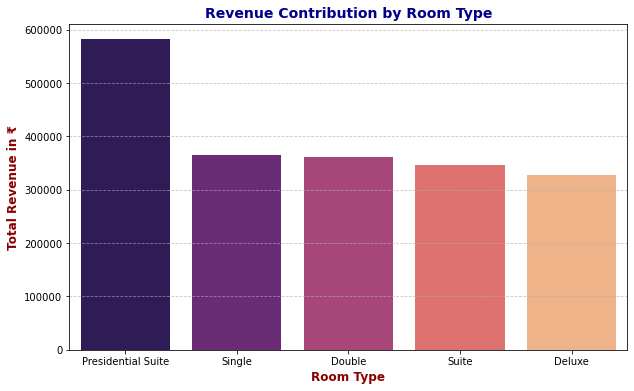

In [ ]:
# Revenue Contribution by Room Type

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure data types match before merging
bookings['room_no'] = bookings['room_no'].astype(str)
rooms['room_no'] = rooms['room_no'].astype(str)
payments['customer_id'] = payments['customer_id'].astype(str)
bookings['customer_id'] = bookings['customer_id'].astype(str)

# Merge bookings with room details and payment information
booking_details = pd.merge(bookings, rooms, on='room_no', how='left')
booking_payments = pd.merge(booking_details, payments, on='customer_id', how='left')

# Calculate total revenue per room type
room_revenue = booking_payments.groupby('room_type')['amount'].sum().reset_index()

# Sort by revenue
room_revenue = room_revenue.sort_values(by='amount', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='amount', data=room_revenue, palette='magma')

plt.title("Revenue by Room Type", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Room Type", fontsize=12, fontweight='bold', color='darkred')
plt.ylabel("Total Revenue in ₹", fontsize=12, fontweight='bold', color='darkred')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

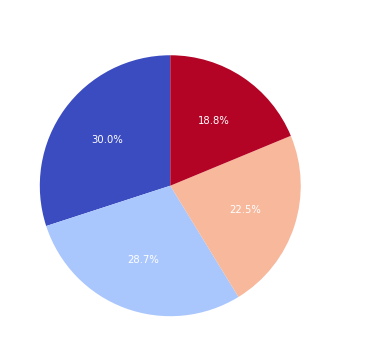

In [22]:
# Payment Methods Analysis

payment_counts = payments['payment_method'].value_counts()

plt.figure(figsize=(6,6))
payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='coolwarm', textprops={'color': 'white'})
plt.title("Preferred Payment Methods",color='white')
plt.ylabel("")
plt.show()